<h3>Modelo de clasificación de imagenes Pizza vs. Helado</h3>
<p>Aldo Tena García - A01275222</p>

In [1]:
#Importar las librerias necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay

import os
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Establecer los directorios de las imágenes
#Directorio base
base_dir = 'D:\DocumentosDD\Profesional\8vo Semestre\Aplicaciones avanzadas\Modulo 2 - IA\ImageClassification'
#Directorios de train y test
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
#Directorios de train para pizza y helado
train_pizza = os.path.join(train_dir,'pizza')
train_icecream = os.path.join(train_dir, 'icecream')
#Directorios de test para pizza y helado
test_pizza = os.path.join(test_dir,'pizza')
test_icecream = os.path.join(test_dir, 'icecream')

In [3]:
#Tamaño al que quieres redimensionar las imágenes (en píxeles)
size = (224,224) 
#Función para iterar sobre todos los archivos en la carpeta
def resize(folder):
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            full_path = os.path.join(folder, file)
            image = Image.open(full_path)
            resized_image = image.resize(size, Image.ANTIALIAS)
            resized_image.save(os.path.join(folder,file))
#Redimensionar test-pizza
resize(test_pizza)
#Redimensionar test-icecream
resize(test_icecream)
#Redimensionar train-pizza
resize(train_pizza)
#Redimensionar train-icecream
resize(train_icecream)

C:\Users\atg00\AppData\Local\Temp\ipykernel_21276\2130578046.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


### Data augmentation

In [4]:
#Configurar los parametros necesarios para el data augmentation
train_datagen = ImageDataGenerator(
					rescale = 1./255,
					rotation_range = 30,
					width_shift_range = 0.2,
					height_shift_range = 0.2,
					shear_range = 0.3,
					zoom_range = 0.3,
					horizontal_flip = True
					)

In [5]:
#Configurar el train_datagen 
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size = (224,224),
					batch_size = 32,
					class_mode ='binary',
					)

Found 720 images belonging to 2 classes.


### Imprimir imágenes generadas

<Figure size 640x480 with 0 Axes>

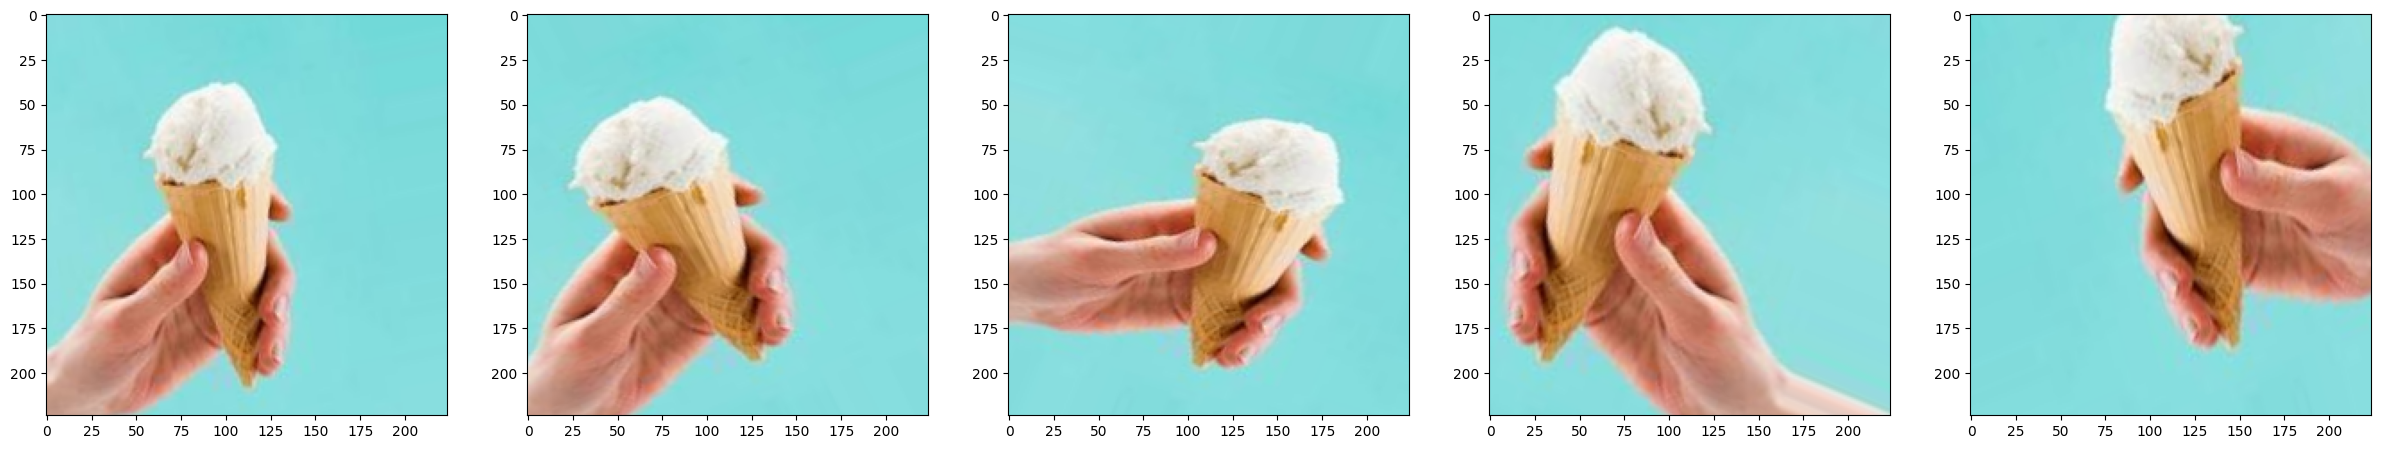

In [6]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30,8)) 
for i in range(5) :
    axarr[i].imshow(train_generator[0][0][0])

(32, 224, 224, 3)
[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0.]


<Figure size 640x480 with 0 Axes>

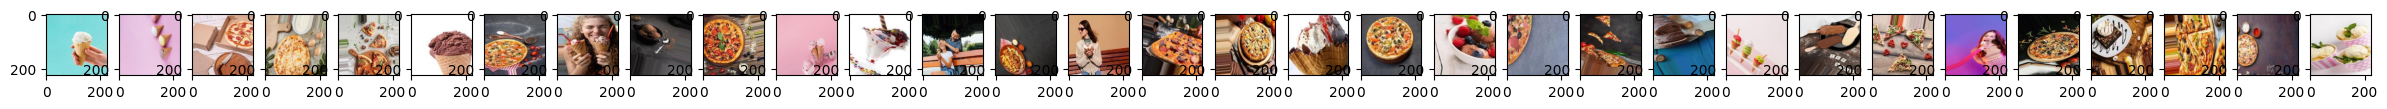

In [7]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
    axarr[i].imshow(images[i])

### MODELO 1 - Red neuronal convolucional

In [8]:
# Definición del modelo
model1 = models.Sequential()

# Primera capa convolucional
model1.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(224, 224, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Segunda capa convolucional
model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Tercera capa convolucional
model1.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.BatchNormalization())

# Cuarta capa convolucional
model1.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())

# Quinta capa convolucional
model1.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.BatchNormalization())

# Capas finales
model1.add(layers.Flatten())
model1.add(layers.Dense(1024, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))  # Cambiar a una única neurona con 'sigmoid'

model1.summary()

# Compilación del modelo
model1.compile(loss='binary_crossentropy',  # Cambiar a 'binary_crossentropy'
                optimizer=optimizers.Adam(learning_rate=0.001),
                metrics=['acc'])

# Entrenamiento del modelo
history = model1.fit(train_generator, epochs=25)

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │       147,58

 Total params: 2,384,385 (9.10 MB)

 Trainable params: 2,380,673 (9.08 MB)

 Non-trainable params: 3,712 (14.50 KB)

Epoch 1/25


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.6996 - loss: 0.8782
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.7966 - loss: 0.6343
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.8314 - loss: 0.4164
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.8522 - loss: 0.3628
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9262 - loss: 0.2151
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9109 - loss: 0.2296
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.9014 - loss: 0.2344
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - acc: 0.9220 - loss: 0.2450
Epoch 9/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9001 - loss: 0.2219
Epoch 10/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9307 - loss: 0.1740
Epoch 11/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9319 - loss: 0.2116
Epoch 12/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - acc: 0.9296 - loss: 0.1968
Epoch 13/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.

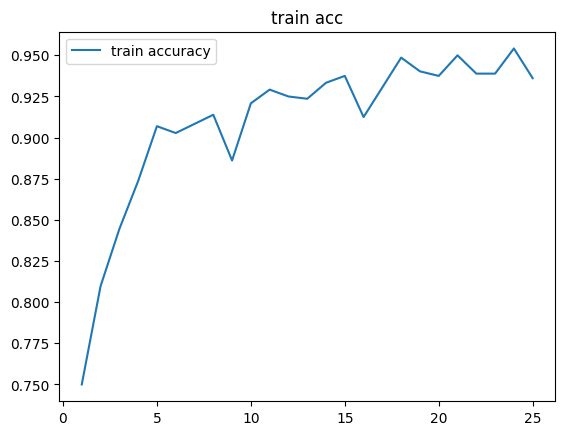

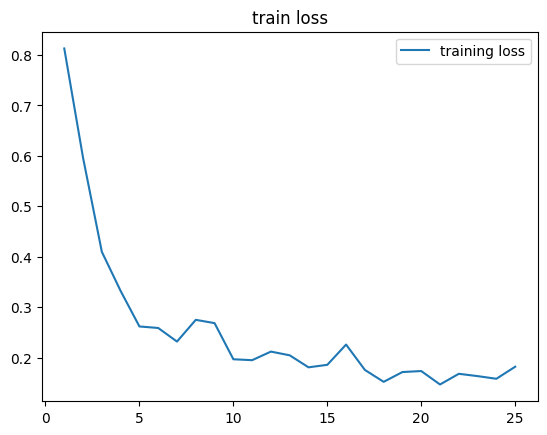

Found 180 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.6392 - loss: 1.6646 

test acc :
 0.6333333253860474


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\atg00\AppData\Local\Temp\ipykernel_21276\2023088074.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  model1_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step
Precisión:
0.625


<Figure size 1000x1000 with 0 Axes>

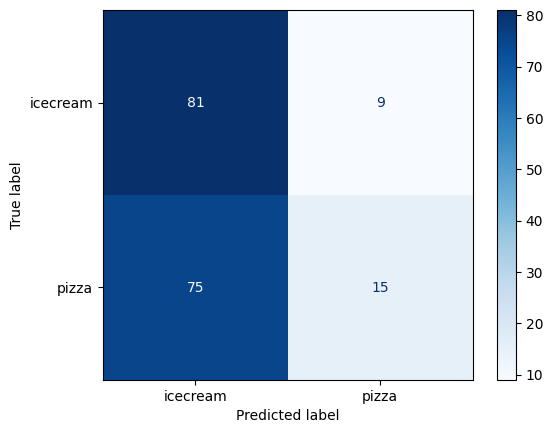


Precision: 0.6250


In [9]:

# Visualización de los resultados de entrenamiento
model1_acc = history.history['acc']
model1_loss = history.history['loss']
model1_epochs = range(1, len(model1_acc) + 1)

plt.plot(model1_epochs, model1_acc, '-', label='train accuracy')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(model1_epochs, model1_loss, '-', label='training loss')
plt.title('train loss')
plt.legend()
plt.show()

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluación del modelo
model1_test_loss, model1_test_acc = model1.evaluate(test_generator, steps=25)
print('\ntest acc :\n', model1_test_acc)

# Generar predicciones en el conjunto de prueba
model1_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
model1_predictions = model1.predict(test_generator, steps=model1_test_steps_per_epoch)
model1_predicted_classes = np.where(model1_predictions > 0.5, 1, 0)

# Obtener etiquetas reales
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular matriz de confusión
model1_cm = confusion_matrix(true_classes, model1_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=model1_cm, display_labels=class_labels)

# Calcular el valor de precisión
model1_precision = precision_score(true_classes, model1_predicted_classes)
print('Precisión:')
print(model1_precision)

# Mostrar matriz de confusión
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular precisión
precision = precision_score(true_classes, model1_predicted_classes)
print('\nPrecision: {:.4f}'.format(precision))

In [10]:
# Guardar el modelo
model1.save("pizza_icecream_1.keras")

### MODELO 2 - Transfer learning con VGG16

In [39]:
from tensorflow.keras.applications import VGG16

# Carga del modelo VGG16 preentrenado
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelación de las capas convolucionales
conv_base.trainable = False

# Definición del modelo
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Resumen del modelo
model.summary()

# Compilación del modelo
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_401         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7586 - loss: 0.5509 - val_accuracy: 0.9438 - val_loss: 0.2238
Epoch 2/30
 1/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8125 - loss: 0.5947

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8125 - loss: 0.5947 - val_accuracy: 1.0000 - val_loss: 0.2043
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9027 - loss: 0.2621 - val_accuracy: 0.9250 - val_loss: 0.2001
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9062 - loss: 0.5557 - val_accuracy: 0.9500 - val_loss: 0.1622
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9011 - loss: 0.2428 - val_accuracy: 0.9187 - val_loss: 0.2040
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9375 - loss: 0.1086 - val_accuracy: 0.8500 - val_loss: 0.3135
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.9157 - loss: 0.2309 - val_accuracy: 0.9250 - val_loss: 0.2083
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8750 - loss: 0.2335 - val_accuracy: 1.0000 - val_loss: 0.0711
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9296 - loss: 0.1516 - val_accuracy: 0.9500 - val_loss: 0.1376

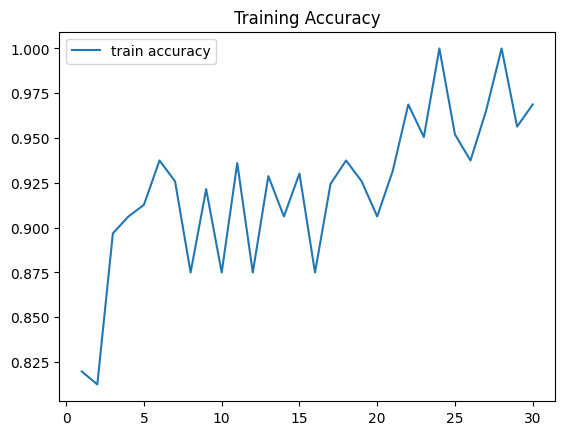

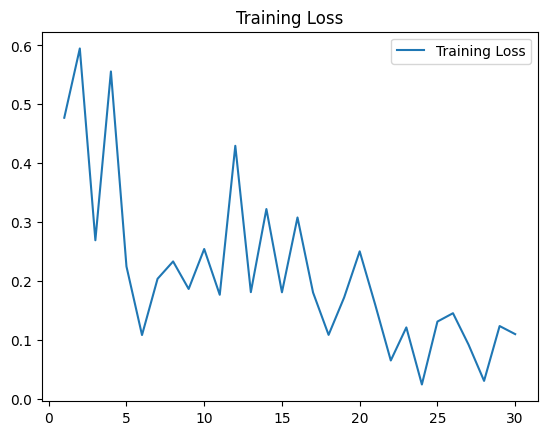

Found 180 images belonging to 2 classes.


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9608 - loss: 0.1094 

Test Accuracy:
 0.9611111283302307


C:\Users\atg00\AppData\Local\Temp\ipykernel_15912\1336414368.py:30: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  model2_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
Precisión:
0.4946236559139785


<Figure size 1000x1000 with 0 Axes>

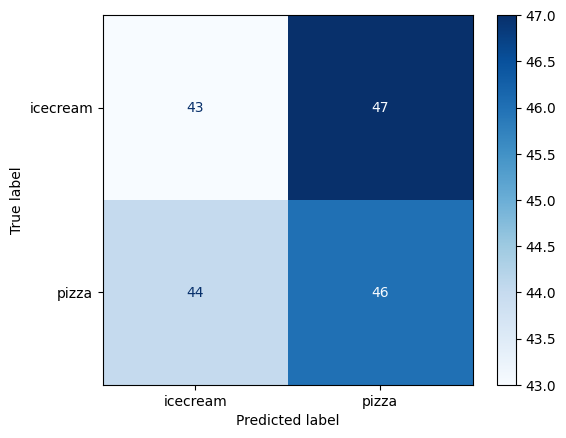

In [41]:
# Visualización de los resultados de entrenamiento
model2_acc = history.history['accuracy']
model2_loss = history.history['loss']
model2_epochs = range(1, len(model2_acc) + 1)

plt.plot(model2_epochs, model2_acc, '-', label='train accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()

plt.plot(model2_epochs, model2_loss, '-', label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluación del modelo
model2_test_loss, model2_test_acc = model2.evaluate(test_generator, steps=25)
print('\nTest Accuracy:\n', model2_test_acc)

# Generar predicciones en el conjunto de prueba
model2_test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
model2_predictions = model2.predict(test_generator, steps=model2_test_steps_per_epoch)
model2_predicted_classes = np.where(model2_predictions > 0.5, 1, 0)

# Obtener etiquetas reales
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular matriz de confusión
model2_cm = confusion_matrix(true_classes, model2_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=model2_cm, display_labels=class_labels)

# Calcular el valor de precisión
model2_precision = precision_score(true_classes, model2_predicted_classes)
print('Precisión:')
print(model2_precision)

# Mostrar matriz de confusión
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1]:
# Guardar el modelo
model.save("pizza_icecream.keras")

NameError: name 'model' is not defined